data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 압축 풀기

In [1]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip

--2022-05-20 07:48:59--  https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip [following]
--2022-05-20 07:48:59--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1835488 (1.8M) [application/zip]
Saving to: ‘commodity.zip’

commodity.zip       100%[===================>]   1.75M  --.-KB/s    in 0.06s   

2022-05-20 07:48:59 (30.7 MB/s) - ‘commodity.zip’ saved [1835488/1835488]



In [2]:
!rm -rf commodity
!unzip commodity.zip

Archive:  commodity.zip
   creating: commodity/
  inflating: commodity/Natural Gas.csv  
  inflating: commodity/Soybean.csv   
  inflating: commodity/Gold.csv      
  inflating: commodity/Platinum.csv  
  inflating: commodity/Heating Oil.csv  
  inflating: commodity/Palladium.csv  
  inflating: commodity/Silver.csv    
  inflating: commodity/Lumber.csv    
  inflating: commodity/Lean Hogs.csv  
  inflating: commodity/Soybean Meal.csv  
  inflating: commodity/Copper.csv    
  inflating: commodity/Live Cattle.csv  
  inflating: commodity/Soybean Oil.csv  
  inflating: commodity/Brent Crude Oil.csv  
  inflating: commodity/Cotton.csv    
  inflating: commodity/RBOB Gasoline.csv  
  inflating: commodity/Oat.csv       
  inflating: commodity/Coffee.csv    
  inflating: commodity/Wheat.csv     
  inflating: commodity/Sugar.csv     
  inflating: commodity/Corn.csv      
  inflating: commodity/Crude Oil.csv  
  inflating: commodity/Cocoa.csv     
  inflating: commodity/Feeder Cattle.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 파라매터 설정

In [4]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

# 데이터 로딩

In [5]:
df = pd.read_csv("commodity/Silver.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.950,4.950,4.895,4.930,4.930,2319.0
1,2000-08-31,4.920,5.045,4.920,5.003,5.003,1612.0
2,2000-09-01,5.035,5.035,4.985,5.004,5.004,1375.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,4.990,5.005,4.975,4.998,4.998,856.0


In [6]:
print(len(df))

5291


# 결측치 처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5181 non-null   float64
 2   High       5181 non-null   float64
 3   Low        5181 non-null   float64
 4   Close      5181 non-null   float64
 5   Adj Close  5181 non-null   float64
 6   Volume     5181 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


In [8]:
df.isnull().sum()

Date           0
Open         110
High         110
Low          110
Close        110
Adj Close    110
Volume       110
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5181 non-null   object 
 1   Open       5181 non-null   float64
 2   High       5181 non-null   float64
 3   Low        5181 non-null   float64
 4   Close      5181 non-null   float64
 5   Adj Close  5181 non-null   float64
 6   Volume     5181 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.8+ KB


# 정렬 순서 확인

In [11]:
df.sort_values(by=["Date"])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.950000,4.950000,4.895000,4.930000,4.930000,2319.0
1,2000-08-31,4.920000,5.045000,4.920000,5.003000,5.003000,1612.0
2,2000-09-01,5.035000,5.035000,4.985000,5.004000,5.004000,1375.0
4,2000-09-05,4.990000,5.005000,4.975000,4.998000,4.998000,856.0
5,2000-09-06,5.000000,5.000000,4.980000,4.983000,4.983000,232.0
...,...,...,...,...,...,...,...
5286,2021-06-03,27.190001,27.459999,27.190001,27.459999,27.459999,20.0
5287,2021-06-04,27.879000,27.879000,27.879000,27.879000,27.879000,0.0
5288,2021-06-07,27.615000,28.000999,27.615000,28.000999,28.000999,4.0
5289,2021-06-08,28.010000,28.010000,27.705000,27.715000,27.715000,27.0


In [12]:
sorted_index = df.sort_values(by=["Date"]).index

In [13]:
print(sorted_index)
print(sorted_index - df.index)
print(sum(sorted_index - df.index))

Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290],
           dtype='int64', length=5181)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=5181)
0


In [14]:
print(df['Close'] - df['Adj Close'])
print(sum(df['Close'] - df['Adj Close']))

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
5286    0.0
5287    0.0
5288    0.0
5289    0.0
5290    0.0
Length: 5181, dtype: float64
0.0


In [15]:
df.drop(columns=["Date", "Adj Close"], inplace=True)

Open


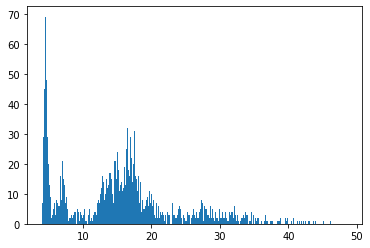

High


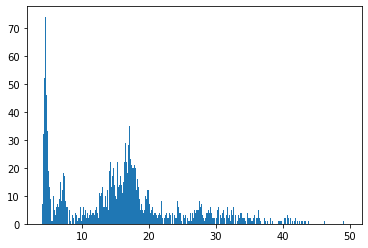

Low


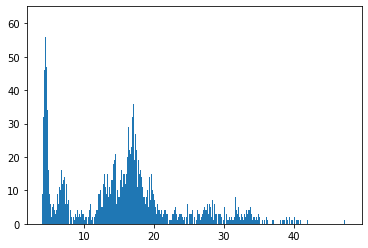

Close


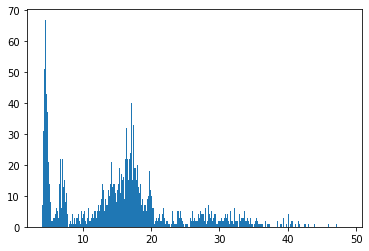

Volume


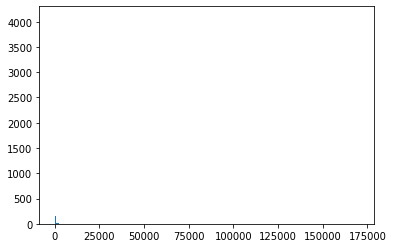

In [16]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

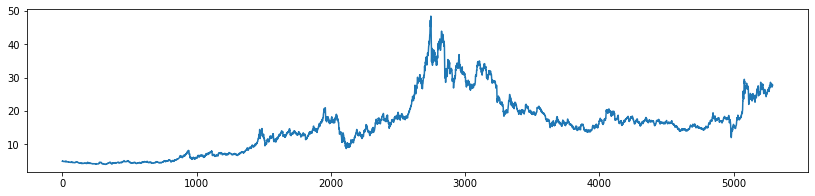

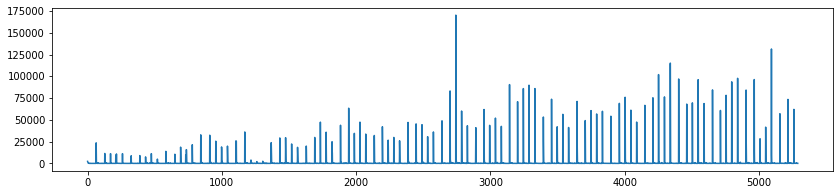

In [17]:
plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df.iloc[:,4])
plt.show()


In [18]:
raw_data = df.to_numpy()
print(raw_data.shape)

(5181, 5)


In [ ]:
print(raw_data[:5])

[[   4.95     4.95     4.895    4.93  2319.   ]
 [   4.92     5.045    4.92     5.003 1612.   ]
 [   5.035    5.035    4.985    5.004 1375.   ]
 [   4.99     5.005    4.975    4.998  856.   ]
 [   5.       5.       4.98     4.983  232.   ]]


# normalize

In [19]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[4.8459999e+01 4.9520000e+01 4.7540001e+01 4.8584000e+01 1.7029700e+05]
[4.026 4.026 4.026 4.026 0.   ]


In [20]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.02079489 0.02031037 0.01997058 0.02028816 0.01361739]
 [0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]]


In [21]:
preprocessed = normalized

# by Data Sampling

In [22]:
numbers = preprocessed

In [23]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [24]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.02079489 0.02031037 0.01997058 0.02028816 0.01361739]
 [0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]
 [0.02147005 0.0209698  0.02077492 0.02040038 0.00176163]
 [0.02056983 0.02020047 0.0203153  0.02013107 0.00070465]
 [0.01978215 0.01943113 0.01974077 0.01927824 0.00066355]
 [0.02045731 0.02009056 0.02008549 0.01981687 0.00123901]
 [0.02011973 0.01965094 0.01962587 0.01943534 0.00051087]]
[0.0195571  0.01943113 0.01962587 0.01934557 0.00060483]

[[0.02011973 0.02239856 0.02054511 0.02192648 0.00946582]
 [0.02270784 0.02217875 0.02203888 0.02194892 0.00807413]
 [0.0216951  0.02151932 0.02180907 0.02181426 0.00502651]
 [0.02192015 0.02140942 0.02192398 0.02147762 0.00136233]
 [0.02147005 0.0209698  0.02077492 0.02040038 0.00176163]
 [0.02056983 0.02020047 0.0203153  0.02013107 0.00070465]
 [0.01978215 

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(5170, 10, 5)
(5170, 5)
Training Data:
(4653, 10, 5)
(4653, 5)
Test Data:
(517, 10, 5)
(517, 5)


train_x[0]
 [[3.15164093e-01 3.07820834e-01 3.21229942e-01 3.13703488e-01
  7.63372226e-05]
 [3.14803986e-01 3.07469117e-01 3.21459753e-01 3.13927914e-01
  1.35058163e-04]
 [3.15051544e-01 3.07710907e-01 3.10015183e-01 3.02751492e-01
  1.17441881e-05]
 [3.03798900e-01 2.97445839e-01 3.06659941e-01 3.03694084e-01
  2.64244232e-04]
 [3.04136501e-01 2.97599705e-01 2.97467452e-01 2.90497756e-01
  2.93604702e-05]
 [2.88495280e-01 2.82432848e-01 2.92756325e-01 2.86301023e-01
  1.82034915e-04]
 [2.84669381e-01 2.79948982e-01 2.90688025e-01 2.85829683e-01
  2.93604702e-05]
 [2.87482542e-01 2.80894184e-01 2.90688025e-01 2.83922079e-01
  1.64418633e-04]
 [2.86694857e-01 2.82938431e-01 2.92756325e-01 2.88881929e-01
  4.11046583e-05]
 [2.89057958e-01 2.85466215e-01 2.95169387e-01 2.91462813e-01
  8.22093167e-05]]

train_y[0]
 [2.91083389e-01 2.84521014e-01 2.93560663e-01 2.89667422e-01
 4.11046583e-05]


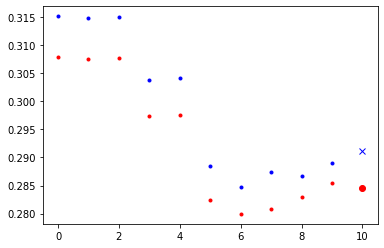

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


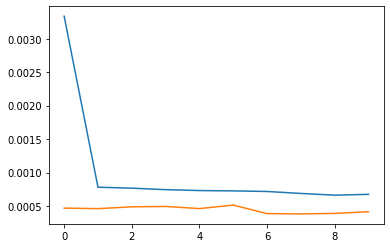

17/17 [==============================] - 0s 2ms/step - loss: 5.4675e-04 - mape: 195002.5469
loss= 0.0005467520677484572
mape= 195002.546875


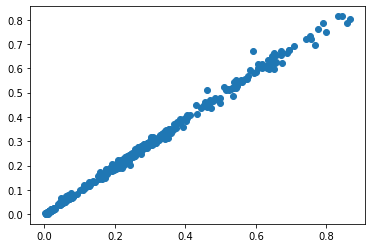

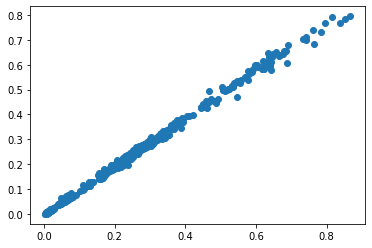

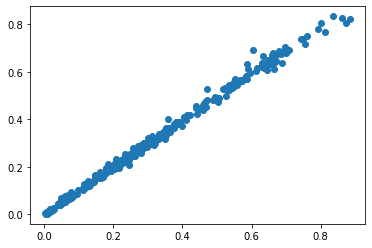

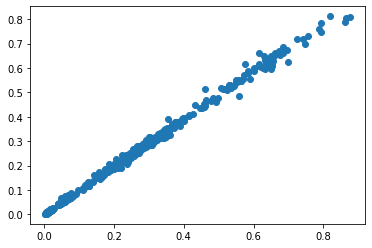

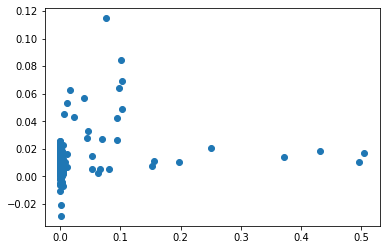

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

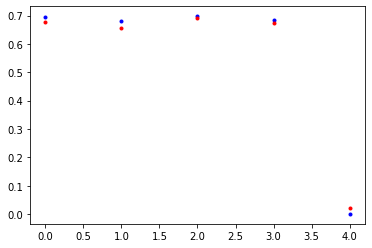

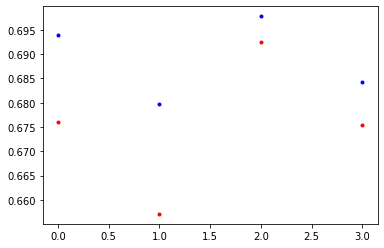

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

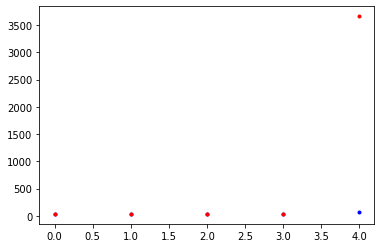

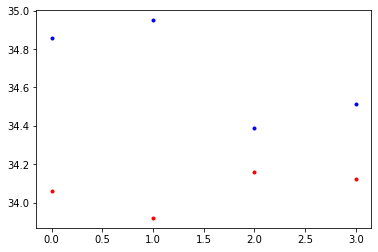

In [ ]:
plt.plot(denomalized_test_y[0], 'b.')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'b.')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

# by Keras Sequence Data Generator

In [ ]:
# from tensorflow.keras.utils import Sequence

# class DataGenerator(Sequence):

#     def __init__(self, numbers, 
#                  sequence_length=SEQUENCE_LENGTH, 
#                  offset=OFFSET, 
#                  batch_size=BATCH_SIZE, 
#                  shuffle=True,
#                  validation_split=0.0,
#                  test_split=0.0,
#                  indexes=None,
#                  max_size=None):
#         self.numbers = numbers
#         self.sequence_length = sequence_length
#         self.offset = offset
#         self.batch_size = batch_size
#         self.shuffle = shuffle
#         self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

#     def __len__(self):
#         return int(np.floor(len(self.indexes) / self.batch_size))

#     def __getitem__(self, index):
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         return self._generate_data(indexes)

#     def on_epoch_end(self):
#         self._shuffle_index()

#     def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
#         if indexes is not None:
#             return indexes, None, None

#         data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
#         all_index = np.arange(data_count)
#         np.random.shuffle(all_index)
#         if max_size is not None:
#             all_index = all_index[:max_size]

#         if validation_split+test_split==0.0:
#             return all_index, None, None

#         valid_i = int(len(all_index)*(1-validation_split-test_split))
#         test_i = int(len(all_index)*(1-test_split))

#         return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
#     def _shuffle_index(self):
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def _generate_data(self, indexes):
#         X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
#         Y = np.empty((len(indexes), self.numbers.shape[-1]))

#         for i, index in enumerate(indexes):
#             X[i] = self.numbers[index:index+self.sequence_length]
#             Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
#         return X, Y

#     def get_all_data(self):
#         return self._generate_data(self.indexes)        

#     def subset(self, type):
#         if type=="train":
#             return DataGenerator(self.numbers, indexes=self.indexes)
#         elif type=="validation" or type=="valid":
#             return DataGenerator(self.numbers, indexes=self.valid_indexes)
#         elif type=="test":
#             return DataGenerator(self.numbers, indexes=self.test_indexes)
#         else:
#             print("invalid type {}".format(type))

In [25]:
from tensorflow.keras.utils import Sequence

class AbstractSequenceDataGenerator(Sequence):

    def __init__(self, numbers=None,
                 sequence_length=10, 
                 offset=1, 
                 batch_size=32, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 base_generator=None,
                 max_size=None):
        if base_generator != None:
            numbers = base_generator.numbers
            sequence_length = base_generator.sequence_length
            offset = base_generator.offset
            batch_size = base_generator.batch_size
            shuffle = base_generator.shuffle
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        raise Exception('_generate_data() not implemented.')

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            self.__init__(indexes=self.indexes, base_generator=self)
            return self
        elif type=="validation" or type=="valid":
            self.__init__(indexes=self.valid_indexes, base_generator=self)
            return self
        elif type=="test":
            self.__init__(indexes=self.test_indexes, base_generator=self)
            return self
        else:
            print("invalid type {}".format(type))

class SeguenceDataGenerator(AbstractSequenceDataGenerator):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        Y = np.empty((len(indexes), self.numbers.shape[-1]))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
        return X, Y        

In [26]:
data_generator = SeguenceDataGenerator(
    numbers=preprocessed, 
    sequence_length=SEQUENCE_LENGTH,
    offset=OFFSET,
    batch_size=BATCH_SIZE,
    validation_split=0.1, test_split=0.1)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 10, 5)
(32, 5)
[[1.01048749e-02 9.86943333e-03 1.03185179e-02 1.00767539e-02
  7.04651286e-04]
 [9.27217917e-03 9.05613927e-03 9.46821691e-03 9.24637551e-03
  0.00000000e+00]
 [7.53927190e-03 7.36360839e-03 7.69867151e-03 7.51829077e-03
  1.76162821e-05]
 [6.50402859e-03 6.90200906e-03 6.64154050e-03 7.00210961e-03
  0.00000000e+00]
 [5.55880644e-03 5.42928738e-03 5.67633392e-03 5.54333677e-03
  4.16918677e-04]
 [6.16644925e-03 6.19861960e-03 6.29682387e-03 6.32882984e-03
  0.00000000e+00]
 [6.12143868e-03 5.97881039e-03 6.25086165e-03 6.10440325e-03
  0.00000000e+00]
 [6.41400744e-03 6.26456236e-03 6.54961606e-03 6.39615782e-03
  0.00000000e+00]
 [7.47175603e-03 7.29766563e-03 7.62972819e-03 7.45096279e-03
  0.00000000e+00]
 [6.90912380e-03 6.74814261e-03 7.05520046e-03 6.88989631e-03
  6.75290815e-04]]
[0.00706666 0.00716578 0.00721607 0.00731631 0.        ]
5171
5171
5171
5171


In [27]:
input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
print(input_shape)

(10, 5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 69,953
Trainable params: 69,953
Non-trainable params: 0
_________________________________________________________________


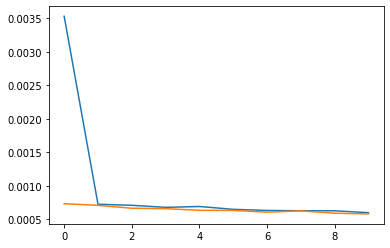

161/161 [==============================] - 0s 2ms/step - loss: 5.8190e-04 - mape: 58725.5156
loss= 0.0005818966310471296
mape= 58725.515625


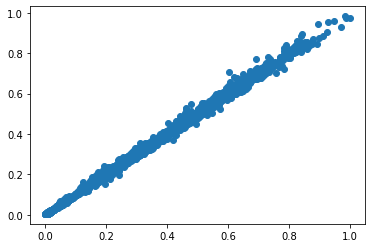

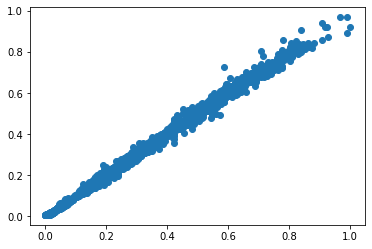

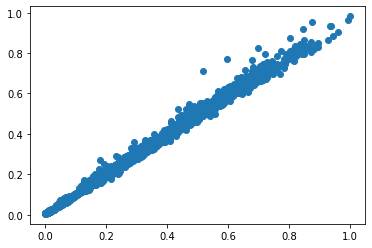

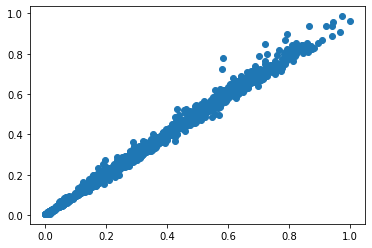

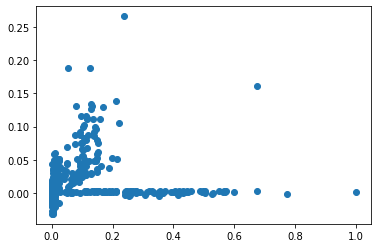

In [28]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
output_shape = preprocessed.shape[-1]

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_data_generator, epochs=10, verbose=0, validation_data=valid_data_generator)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
for i in range(output_shape):
    plt.scatter(batch_y[:,i], y_[:,i])
    plt.show()